# Clayton Lima
## Case vaga de Analytics Engineer

### Contexto:

A partir de uma base de dados com um histórico de informações sobre atrasos de voos em aeroportos americanos, pedimos que responda às perguntas abaixo:



### Perguntas:

1. Faça pelo menos 3 testes de consistência de dados da base e explique os resultados.

2. Dentre os motivos que geram atrasos, qual o principal?

3. Quais os aeroportos que mais sofrem com as condições climáticas? Este efeito é sazonal?

4. Qual o pior ano (da base) em termos de atrasos? Dentre os motivos geradores de atrasos, houve algum que se destacou?

5. Devido ao tipo de operação das companhias aéreas, quando há atraso em um voo, isso acaba impactando os voos seguintes.

Dessa forma, um único problema de atraso de aeronave pode atrasar vários voos. Suponha que você precisa analisar este efeito em cascata em uma nova análise, quais dados você solicitaria?



### Observações:

1. Quando houver mais de uma forma de responder a pergunta (mais de um ângulo de análise), você pode elaborar premissas ou explorar os diferentes caminhos.

2. Fique a vontade para utilizar a base em formato .json ou .csv

3. Na pergunta 5, entende-se que a base não dispõe dos dados necessários para análise. É pedido então um exercício de definir que dados seriam necessários para analisar o que foi pedido.

# Imports

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

# Lendo o arquivo

In [10]:
df_airport = pd.read_csv('input/airlines.csv')
df_airport.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Names,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,328,"American Airlines Inc.,JetBlue Airways,Contine...",11,216,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,66,"American Airlines Inc.,Alaska Airlines Inc.,Co...",14,138,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,78,"American Airlines Inc.,Continental Air Lines I...",11,29,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,54,"American Airlines Inc.,Continental Air Lines I...",11,73,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,58,"American Airlines Inc.,Alaska Airlines Inc.,Co...",13,74,1100,18,5321,6513,13775,13712,20999,120,52747,4141


# Perguntas e discussões
## 1. Faça pelo menos 3 testes de consistência de dados da base e explique os resultados.

### Primeiro teste de consistência

In [3]:
df_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Airport.Code                                         4408 non-null   object
 1   Airport.Name                                         4408 non-null   object
 2   Time.Label                                           4408 non-null   object
 3   Time.Month                                           4408 non-null   int64 
 4   Time.Month Name                                      4408 non-null   object
 5   Time.Year                                            4408 non-null   int64 
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64 
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64 
 8   Statistics.# of Delays.National Aviation System      4408 non-null   int64 
 9

Verificando se temos alguma linha com informação nula no conjunto para tratarmos. E validando se as colunas em estão em seus respectivos formatos (texto, número, etc). Podemos

### Segundo teste de consistência

In [4]:
df_airport.describe()

,Time.Month,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.578947,2009.243421,574.632486,789.078947,954.580309,5.575544,78.216878,12.253403,213.558076,2402.000454,27.880898,9254.420826,11897.860254,35021.369782,49410.274955,45077.107985,211.769737,135997.535163,6276.982759
std,3.457890,3.667475,329.616475,561.798420,921.907801,6.007046,75.181726,2.289861,288.873477,1710.947613,36.356399,5337.214211,6861.691876,24327.721037,38750.017050,57636.745683,257.174789,113972.276370,6477.417169
min,1.000000,2003.000000,112.000000,86.000000,61.000000,-1.000000,1.000000,3.000000,3.000000,283.000000,0.000000,2003.000000,2533.000000,6016.000000,5121.000000,2183.000000,0.000000,14752.000000,46.000000
25%,4.000000,2006.000000,358.000000,425.000000,399.000000,2.000000,33.000000,11.000000,58.000000,1298.750000,8.000000,5708.750000,7400.000000,19530.750000,25084.250000,14389.000000,65.000000,65444.750000,2310.750000
50%,7.000000,2009.000000,476.000000,618.500000,667.500000,4.000000,58.000000,12.000000,123.000000,1899.000000,15.000000,7477.000000,9739.500000,27782.000000,37483.000000,25762.000000,141.000000,100711.000000,4298.500000
75%,10.000000,2012.000000,692.000000,959.000000,1166.000000,7.000000,98.000000,14.000000,250.000000,2950.000000,32.000000,10991.500000,13842.500000,41606.000000,59951.250000,50362.000000,274.000000,164294.750000,7846.000000
max,12.000000,2016.000000,3087.000000,4483.000000,9066.000000,94.000000,812.000000,18.000000,3680.000000,13699.000000,442.000000,31468.000000,38241.000000,220796.000000,345456.000000,602479.000000,4949.000000,989367.000000,76770.000000


Dando uma passada geral nas estatísticas básicas das colunas númericas e avaliando se temos algo fora do comum.
- Verificar Statistics.# of Delays.Security e entender o motivo de termos um valor negativo.


Analisando as linhas com Statistics.# of Delays.Security menores que 0 levantada acima.
Precisaremos tratar esses dois casos para que não influenciem negativamente quantos formos sumarizar as informações.

In [5]:
df_airport[df_airport['Statistics.# of Delays.Security'] < 0]

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
115,TPA,"Tampa, FL: Tampa International",2003/09,9,September,2003,135,197,283,-1,...,629,0,4535,5198,6378,10114,10231,13,27377,637
1845,MIA,"Miami, FL: Miami International",2008/09,9,September,2008,244,190,370,-1,...,827,5,3736,4635,19850,12366,11713,5,45073,1135


## 2. Dentre os motivos que geram atrasos, qual o principal?

In [38]:
colunas_atraso = ['Statistics.# of Delays.Carrier', 'Statistics.# of Delays.Late Aircraft', 'Statistics.# of Delays.National Aviation System', 'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather']
df_atraso = df_airport[colunas_atraso]
df_atraso.sum().sort_values(ascending=False)

Statistics.# of Delays.National Aviation System    4207790
Statistics.# of Delays.Late Aircraft               3478260
Statistics.# of Delays.Carrier                     2532980
Statistics.# of Delays.Weather                      344780
Statistics.# of Delays.Security                      24577
dtype: int64

Selecionando apenas as colunas de atrasos e as sumarizando podemos ver que o principal motivo de atraso o "National Aviation System" com mais de 4 milhões de atrasos no conjunto.

## 3. Quais os aeroportos que mais sofrem com as condições climáticas? Este efeito é sazonal?

In [7]:
group_atraso_clima = df_airport.groupby(by=['Airport.Code'])['Statistics.# of Delays.Weather'].sum()
group_atraso_clima.sort_values(ascending=False).head(5)

Airport.Code
ATL    40113
DFW    30476
ORD    24358
LGA    16350
DEN    15556
Name: Statistics.# of Delays.Weather, dtype: int64

Acima temos os cinco aeroportos que mais sofreram com atrasos por clima.

In [8]:
group_minutos_clima = df_airport.groupby(by=['Airport.Code'])['Statistics.Minutes Delayed.Weather'].sum()
group_minutos_clima.sort_values(ascending=False).head(5)

Airport.Code
ATL    3209941
DFW    2549836
ORD    2192250
DEN    1240212
IAH    1209686
Name: Statistics.Minutes Delayed.Weather, dtype: int64

E acima temos os aeroportos que mais tiveram atrasos em minutos no conjunto de dados.

Partindo do princípio que um aeroporto pode ter um número de grande de problemas climáticos apenas por ser maior que os outros, pensei em também verificarmos quais são os aeroportos que possuem uma maior porcentagem de problemas climáticos comparando entre seus próprios problemas e não entre aeroportos.

In [44]:
colunas_atraso_aeroporto = ['Airport.Code', 'Statistics.# of Delays.Carrier', 'Statistics.# of Delays.Late Aircraft', 'Statistics.# of Delays.National Aviation System', 'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather']
df_atraso_aeroporto = df_airport[colunas_atraso_aeroporto]
df_atraso_aeroporto = df_atraso_aeroporto.set_index('Airport.Code')

df_atraso_aeroporto['Atraso_Total'] = df_atraso_aeroporto.sum(axis=1)
df_atraso_aeroporto['%Weather_Delay'] = df_atraso_aeroporto['Statistics.# of Delays.Weather'] / df_atraso['Atraso_Total']
df_atraso_aeroporto.sort_values(by=['%Weather_Delay'], ascending=False).head(5)

KeyError: 'Atraso_Total'

## 4. Qual o pior ano (da base) em termos de atrasos? Dentre os motivos geradores de atrasos, houve algum que se destacou?

In [11]:
df_airport.groupby(by=['Time.Year'])['Statistics.Flights.Delayed'].sum()

Time.Year
2003     411570
2004     880677
2005     925578
2006    1024612
2007    1129439
2008     965136
2009     787472
2010     732445
2011     715560
2012     658326
2013     805063
2014     796314
2015     707800
2016      48026
Name: Statistics.Flights.Delayed, dtype: int64

In [14]:
df_airport['']
df_airport.groupby(by=['Time.Year'])['Statistics.Minutes Delayed.Total'].sum()

Time.Year
2003    21185559
2004    46609028
2005    50060286
2006    56997528
2007    64942741
2008    56598187
2009    44005337
2010    40660911
2011    40751156
2012    38057964
2013    47098086
2014    46493190
2015    43121664
2016     2895498
Name: Statistics.Minutes Delayed.Total, dtype: int64

<AxesSubplot:xlabel='Time.Year'>

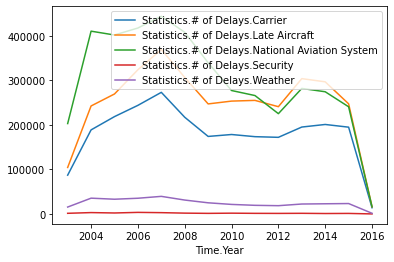

In [20]:
#colunas_numero_atraso = ['Statistics.# of Delays.Carrier', 'Statistics.# of Delays.Late Aircraft', 'Statistics.# of Delays.National Aviation System', 'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather']
df_airport.groupby(by=['Time.Year'])[colunas_numero_atraso].sum().plot()

<AxesSubplot:xlabel='Time.Year'>

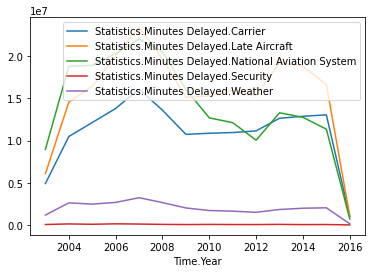

In [22]:
colunas_minuto_atraso = ['Statistics.Minutes Delayed.Carrier', 'Statistics.Minutes Delayed.Late Aircraft', 'Statistics.Minutes Delayed.National Aviation System', 'Statistics.Minutes Delayed.Security', 'Statistics.Minutes Delayed.Weather']
df_airport.groupby(by=['Time.Year'])[colunas_minuto_atraso].sum().plot()

## 5. Devido ao tipo de operação das companhias aéreas, quando há atraso em um voo, isso acaba impactando os voos seguintes.
- Precisamos das informações sobre o tipo de operação das companhias
    
- Precisamos de uma base com abertura por dia e com os timestamps de cada vôo para que possamos analisar o atraso acumulado a partir de um vôo específico.